In [168]:
import re

In [169]:
print("Vebri Satriadi")

Vebri Satriadi


In [174]:
from pyspark import SparkContext

In [176]:
sc

<SparkContext master=local appName=ProjectApp>

In [178]:
logfile = sc.textFile('project/notebook.log')

In [179]:
logfile.first()

'[I 12:09:13.491 NotebookApp] Using MathJax: /static/vendor/MathJax-2.5-latest/MathJax.js'

In [ ]:
logfile.take(20)

In [181]:
logFileInfo = logfile.filter(lambda line: "INFO" in line)

In [182]:
logFileInfo.take(5)

['15/10/14 14:29:21 INFO SparkContext: Running Spark version 1.4.1',
 '15/10/14 14:29:22 INFO SecurityManager: Changing view acls to: notebook',
 '15/10/14 14:29:22 INFO SecurityManager: Changing modify acls to: notebook',
 '15/10/14 14:29:22 INFO SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(notebook); users with modify permissions: Set(notebook)',
 '15/10/14 14:29:23 INFO Slf4jLogger: Slf4jLogger started']

In [183]:
logFileWarning = logfile.filter(lambda line: "WARN" in line

In [184]:
logFileWarning.take(5)

['[C 12:09:13.565 NotebookApp] WARNING: The notebook server is listening on all IP addresses and not using encryption. This is not recommended.',
 '[C 12:09:13.565 NotebookApp] WARNING: The notebook server is listening on all IP addresses and not using authentication. This is highly insecure and not recommended.',
 '[C 05:23:31.934 NotebookApp] WARNING: The notebook server is listening on all IP addresses and not using encryption. This is not recommended.',
 '[C 05:23:31.935 NotebookApp] WARNING: The notebook server is listening on all IP addresses and not using authentication. This is highly insecure and not recommended.',
 '[C 17:47:53.607 NotebookApp] WARNING: The notebook server is listening on all IP addresses and not using encryption. This is not recommended.']

In [185]:
logFileInfo.count()

13438

In [186]:
logFileWarning.count()

648

In [187]:
print("Jawaban saya: logFileInfo")

Jawaban saya: logFileInfo


In [ ]:
logFileInfoMinusDate = []

for line in logFileInfo.collect():
    out = re.sub(r'\d+\/\d+\/\d+|\d+:\d+:\d+', "", line)
    logFileInfoMinusDate.append(out)
    
logFileInfoMinusDate

In [ ]:
logFileInfoMinusDate = sc.parallelize(logFileInfoMinusDate)

logFileInfoMinusDate.collect()

In [190]:
logFileInfoMinusDate.take(5)

['  INFO SparkContext: Running Spark version 1.4.1',
 '  INFO SecurityManager: Changing view acls to: notebook',
 '  INFO SecurityManager: Changing modify acls to: notebook',
 '  INFO SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(notebook); users with modify permissions: Set(notebook)',
 '  INFO Slf4jLogger: Slf4jLogger started']

In [191]:
wordCounts = logFileInfoMinusDate.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a,b : a + b)

In [192]:
wordCounts.take(10)

[('INFO', 13208),
 ('SparkContext:', 862),
 ('Running', 837),
 ('Spark', 47),
 ('version', 26),
 ('1.4.1', 24),
 ('SecurityManager:', 96),
 ('Changing', 48),
 ('view', 48),
 ('acls', 72)]

In [193]:
wordCounts.sortBy((lambda a: a[1]), False).take(20)

[('INFO', 13208),
 ('in', 6170),
 ('at', 4142),
 ('task', 3656),
 ('=', 3315),
 ('DAGScheduler:', 3287),
 ('stage', 3248),
 ('(TID', 3248),
 ('on', 1802),
 ('with', 1771),
 ('MemoryStore:', 1725),
 ('memory', 1675),
 ('MB)', 1675),
 ('0.0', 1673),
 ('KB,', 1648),
 ('Executor:', 1646),
 ('1.0', 1625),
 ('TaskSetManager:', 1624),
 ('Finished', 1624),
 ('ResultStage', 1620)]

In [194]:
print("Kata terbanyak keduapuluh adalah: MemoryStore")

Kata terbanyak keduapuluh adalah: MemoryStore


In [197]:
hapus = ['in', 'at', 'an', 'with']

logFileInfoClean = logFileInfoMinusDate.filter(lambda X: all(val not in X for val in hapus))

In [198]:
logfileInfoSuperClean = logFileInfoClean.flatMap(lambda line: line.split()).map(lambda word: (word, 1)).reduceByKey(lambda a,b : a + b)
logfileInfoSuperClean.sortBy((lambda a: a[1]), False).take(20)

[('INFO', 942),
 ('TaskSchedulerImpl:', 408),
 ('Removed', 408),
 ('TaskSet', 408),
 ('whose', 408),
 ('tasks', 408),
 ('have', 408),
 ('all', 408),
 ('completed,', 408),
 ('from', 408),
 ('pool', 408),
 ('HadoopRDD:', 356),
 ('Input', 356),
 ('split:', 356),
 ('file:/resources/README.md:0+1784', 173),
 ('file:/resources/README.md:1784+1784', 171),
 ('started', 89),
 ('Utils:', 87),
 ('Successfully', 85),
 ('service', 66)]

In [199]:
wordCloud = []

for line in logFileInfo.collect():
    out = re.sub(r'\d+\/\d+\/\d+|\d+:\d+:\d+', "", line)
    wordCloud.append(out)
    
wordCloud

['  INFO SparkContext: Running Spark version 1.4.1',
 '  INFO SecurityManager: Changing view acls to: notebook',
 '  INFO SecurityManager: Changing modify acls to: notebook',
 '  INFO SecurityManager: SecurityManager: authentication disabled; ui acls disabled; users with view permissions: Set(notebook); users with modify permissions: Set(notebook)',
 '  INFO Slf4jLogger: Slf4jLogger started',
 '  INFO Remoting: Starting remoting',
 '  INFO Remoting: Remoting started; listening on addresses :[akka.tcp://sparkDriver@172.17.0.22:53333]',
 "  INFO Utils: Successfully started service 'sparkDriver' on port 53333.",
 '  INFO SparkEnv: Registering MapOutputTracker',
 '  INFO SparkEnv: Registering BlockManagerMaster',
 '  INFO DiskBlockManager: Created local directory at /tmp/spark-fe150378-7bad-42b6-876b-d14e2c193eb6/blockmgr-c142f2f1-ebb6-4612-945b-0a67d156230a',
 '  INFO MemoryStore: MemoryStore started with capacity 265.4 MB',
 '  INFO HttpFileServer: HTTP File server directory is /tmp/spar

In [200]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

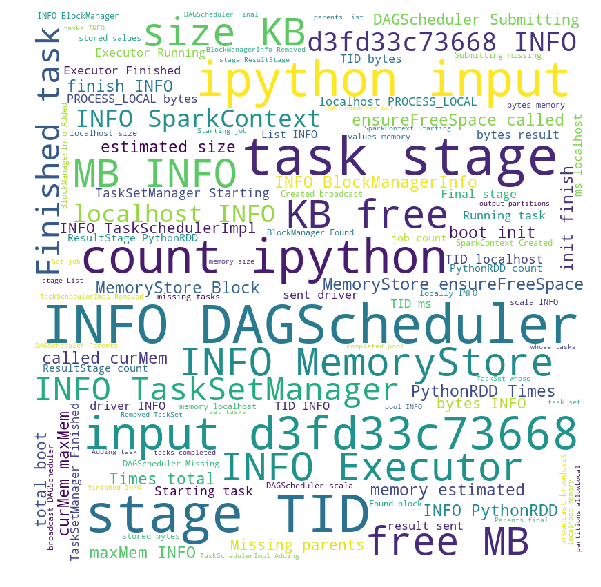

In [201]:
words = ' '
for i in wordCloud:
    words += ' '+i
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white',                 
                min_font_size = 10).generate(words)

# # plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

######

In [202]:
import pandas as pd

In [203]:
df = pd.read_csv("project/fifa_players.csv")
df = df.drop("Unnamed: 0", axis = 1)
df

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M
5,183277,E. Hazard,27,https://cdn.sofifa.org/players/4/19/183277.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,91,Chelsea,https://cdn.sofifa.org/teams/2/light/5.png,...,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,€172.1M
6,177003,L. Modrić,32,https://cdn.sofifa.org/players/4/19/177003.png,Croatia,https://cdn.sofifa.org/flags/10.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,€137.4M
7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
9,200389,J. Oblak,25,https://cdn.sofifa.org/players/4/19/200389.png,Slovenia,https://cdn.sofifa.org/flags/44.png,90,93,Atlético Madrid,https://cdn.sofifa.org/teams/2/light/240.png,...,70.0,27.0,12.0,18.0,86.0,92.0,78.0,88.0,89.0,€144.5M


In [204]:
from pyspark import SQLContext
sqlContext = SQLContext(sc)

In [205]:
sdf = (sqlContext.read.format("csv").options(header="true").load("project/fifa_players.csv"))

In [206]:
sdf.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- ID: string (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: string (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: string (nullable = true)
 |-- Potential: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: string (nullable = true)
 |-- Preferred Foot: string (nullable = true)
 |-- International Reputation: string (nullable = true)
 |-- Weak Foot: string (nullable = true)
 |-- Skill Moves: string (nullable = true)
 |-- Work Rate: string (nullable = true)
 |-- Body Type: string (nullable = true)
 |-- Real Face: string (nullable = true)
 |-- Position: string (nullable = true)
 |-- Jersey Number: string (nullable = true)
 |-- Joined: string (nullable = true)
 |-- Loaned From: string (nullable = t

In [207]:
sdf.select('Name').first()

Row(Name='L. Messi')

In [208]:
sdf.select('Name').sort('Potential', ascending = False).show()

+-----------------+
|             Name|
+-----------------+
|        K. Mbappé|
|        P. Dybala|
|Cristiano Ronaldo|
|         L. Messi|
|        Neymar Jr|
|           De Gea|
|         J. Oblak|
|    G. Donnarumma|
|        S. Umtiti|
|       O. Dembélé|
|          L. Sané|
|      M. Škriniar|
|  Vinícius Júnior|
|     K. De Bruyne|
|    Marco Asensio|
|    Gabriel Jesus|
|    M. ter Stegen|
|         P. Pogba|
|             Isco|
|        L. Suárez|
+-----------------+
only showing top 20 rows



In [209]:
sdf.select('Name').sort('Potential', ascending = False).first()

Row(Name='K. Mbappé')

In [210]:
sdf.select('Name').filter(sdf['Potential'] > 92).show()

+-----------------+
|             Name|
+-----------------+
|         L. Messi|
|Cristiano Ronaldo|
|        Neymar Jr|
|           De Gea|
|         J. Oblak|
|        P. Dybala|
|        K. Mbappé|
|    G. Donnarumma|
+-----------------+



In [211]:
sdf.groupby(['Potential']).agg({'Name': 'COUNT'}).show()

+---------+-----------+
|Potential|count(Name)|
+---------+-----------+
|       51|          2|
|       54|          7|
|       69|       1175|
|       87|         61|
|       73|       1051|
|       64|        714|
|       59|        125|
|       85|        139|
|       52|         10|
|       71|       1140|
|       70|       1203|
|       61|        251|
|       75|        951|
|       78|        547|
|       89|         33|
|       77|        698|
|       90|         21|
|       68|       1136|
|       60|        165|
|       55|         18|
+---------+-----------+
only showing top 20 rows

